In [1]:
import pandas as pd # standard
import numpy as np # standard

import matplotlib.pyplot as plt
import seaborn as sns

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

In [2]:
prev = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")
substages = pd.read_excel("patient_substage.xlsx")
stage_df = pd.merge(prev, substages, left_on = "pub_id", right_on = "pub_id")

In [3]:
stage_df = stage_df[stage_df["Diagnosis"] != "Control"]
stage_df = stage_df.drop(["sample_id", "CancerType"], axis = 1)
stage_df = stage_df.reset_index(drop=True)

In [4]:
stage_df["cancer stage"] = stage_df["Diagnosis"] +"_" + stage_df["Current Clinical Stage"]

stage_df.columns

Index(['pub_id', 'T45', 'T45.1', 'T45.2', 'T45.3', 'T45.4', 'T45.5', 'T45.6',
       'T45.7', 'T45.8',
       ...
       'T89.6', 'T89.7', 'T89.8', 'T89.9', 'T90', 'Current Clinical Stage',
       'Substage', 'Diagnosis', 'Stage', 'cancer stage'],
      dtype='object', length=457)

In [5]:
stage_df_long = pd.melt(stage_df, id_vars=["pub_id", 'Current Clinical Stage', 'Substage', 'Diagnosis', 'Stage', 'cancer stage'], var_name = "temp", value_name="dsp")
stage_df_long["temp"] = stage_df_long["temp"].str.replace("T", "")
stage_df_long["temp"] = stage_df_long["temp"].astype(float)

In [16]:
cancer_type = "AC"
graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer_type]

f = stage_df[stage_df["Diagnosis"] == cancer_type]
f["Current Clinical Stage"].value_counts()


Current Clinical Stage
4    29
1    16
3    15
2    10
Name: count, dtype: int64

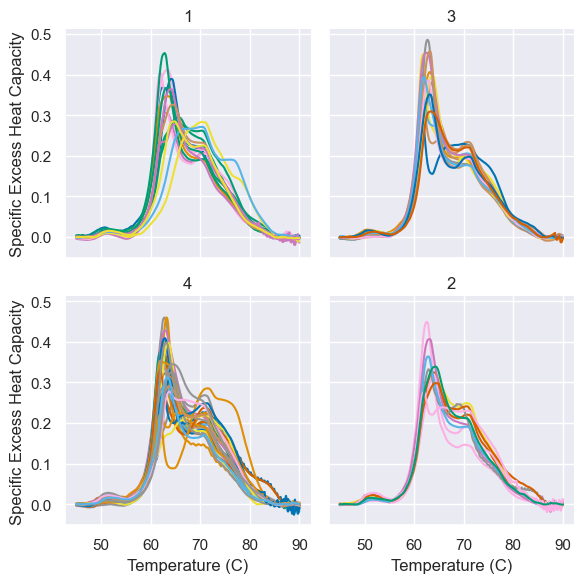

In [20]:
g = sns.FacetGrid(graph_df, col="Current Clinical Stage", col_wrap= 2, hue="pub_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")

In [21]:
cancer_type = "SCC"
graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer_type]

f = stage_df[stage_df["Diagnosis"] == cancer_type]
f["Current Clinical Stage"].value_counts()


Current Clinical Stage
3    16
4    15
2     8
1     7
Name: count, dtype: int64

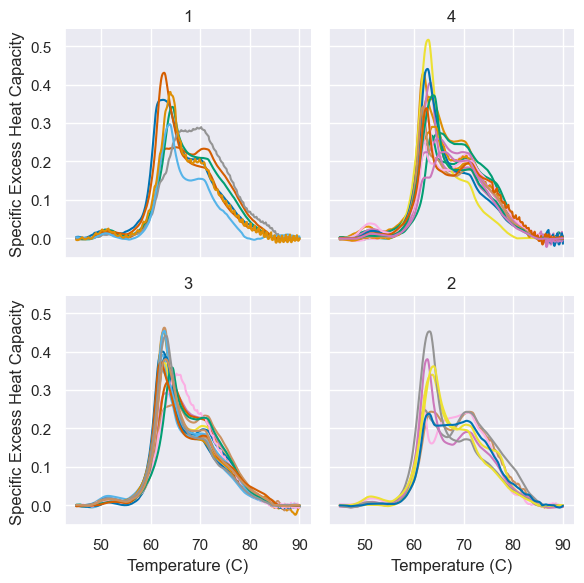

In [22]:
g = sns.FacetGrid(graph_df, col="Current Clinical Stage", col_wrap= 2, hue="pub_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")

In [23]:
cancer_type = "SCLC"
graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer_type]

f = stage_df[stage_df["Diagnosis"] == cancer_type]
f["Current Clinical Stage"].value_counts()

Current Clinical Stage
LT    11
EX     5
Name: count, dtype: int64

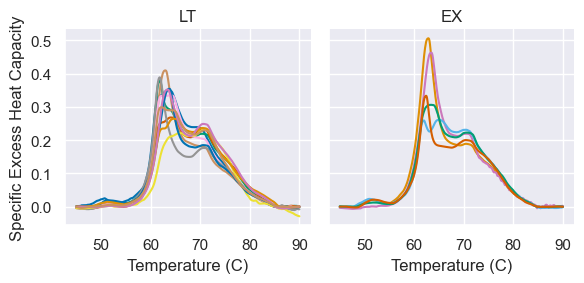

In [24]:
g = sns.FacetGrid(graph_df, col="Current Clinical Stage", col_wrap= 2, hue="pub_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")

In [26]:
cancer_type = "Large"
graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer_type]

f = stage_df[stage_df["Diagnosis"] == cancer_type]
f["Current Clinical Stage"].value_counts()

Current Clinical Stage
4    2
1    2
2    2
Name: count, dtype: int64

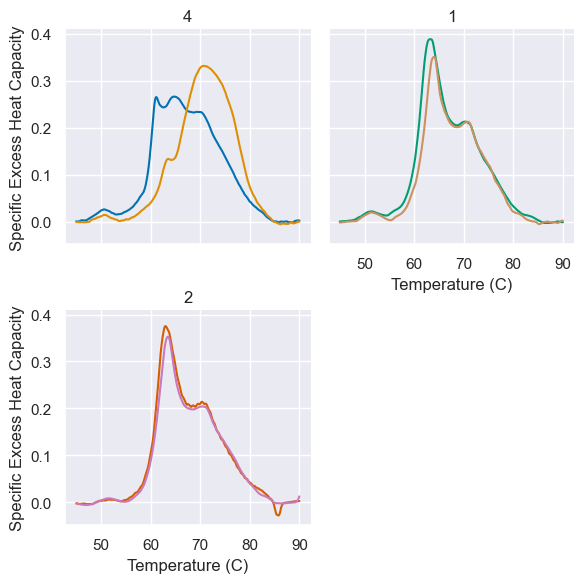

In [27]:
g = sns.FacetGrid(graph_df, col="Current Clinical Stage", col_wrap= 2, hue="pub_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")

In [29]:
cancer_type = "NOS"
graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer_type]

f = stage_df[stage_df["Diagnosis"] == cancer_type]
f["Current Clinical Stage"].value_counts()

Current Clinical Stage
4    6
3    1
1    1
Name: count, dtype: int64

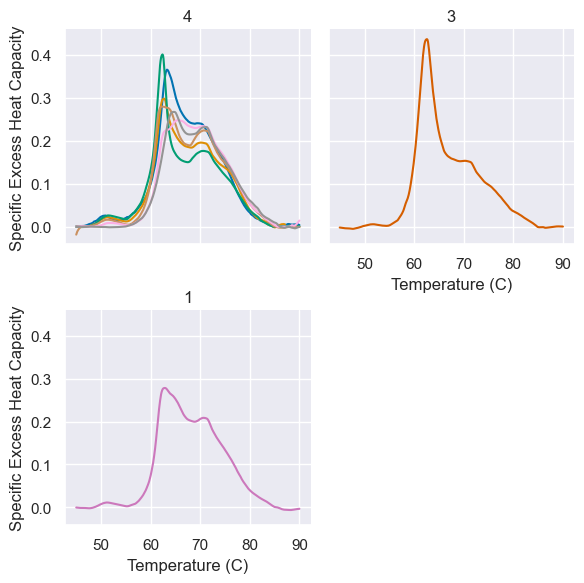

In [30]:
g = sns.FacetGrid(graph_df, col="Current Clinical Stage", col_wrap= 2, hue="pub_id", palette = 'colorblind')
g.map_dataframe(sns.lineplot, x="temp", y="dsp")
g.set_axis_labels("Temperature (C)", "Specific Excess Heat Capacity")
g.set_titles(col_template="{col_name}")